# Data: Dry Spell Lengths by Month

Make violin plot comparison plots of the dry spell lengths by month

## Imports and Parameters

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle
import seaborn as sns
from copy import deepcopy

In [3]:
IN_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Data\Processed'
PRISM_IN = "DryDays_1981-2010.pickle"
LOCA_DP_IN = "DryDays_1981-2010.pickle"
LOCA_P1_IN = "DryDays_LOCA_2011-2040.pickle"
LOCA_P2_IN = "DryDays_LOCA_2041-2070.pickle"
LOCA_P3_IN = "DryDays_LOCA_2071-2100.pickle"
NUM_MODEL = 64

In [4]:
OUT_DIR = r'C:\Users\nmartin\Documents\CC_IRD\Events'

In [5]:
ExGridID = lambda MID: int( MID.split("_")[1] )

In [6]:
PRISM_GRID = {  665148 : 0.00176052422816,
                666551 : 0.00003619777770,
                666552 : 0.00447893807178,
                666553 : 0.02233714669049,
                667952 : 0.00000017337539,
                667953 : 0.00759409538941,
                667954 : 0.00944984698009,
                667955 : 0.02000399281203,
                667956 : 0.02887520321616,
                667957 : 0.03994590652912,
                667958 : 0.01503588013165,
                669356 : 0.00040530215007,
                669357 : 0.01642009505413,
                669358 : 0.04025673468223,
                669359 : 0.04025524462676,
                669360 : 0.04025378667464,
                669361 : 0.04025236082198,
                669362 : 0.03036726578528,
                669363 : 0.00019977241236,
                670761 : 0.01225891679128,
                670762 : 0.04027489656596,
                670763 : 0.04027337248402,
                670764 : 0.04027188055013,
                670765 : 0.04027042075996,
                670766 : 0.03695970510496,
                670767 : 0.00962956858856,
                672166 : 0.01457105102829,
                672167 : 0.04029151499066,
                672168 : 0.04028998899039,
                672169 : 0.04028849517830,
                672170 : 0.03708655350147,
                672171 : 0.01247135550851,
                673571 : 0.01120101439253,
                673572 : 0.04030811211126,
                673573 : 0.04030658419330,
                673574 : 0.03927785081953,
                673575 : 0.00709453472727,
                674976 : 0.00036798560164,
                674977 : 0.02811487768940,
                674978 : 0.04032315808561,
                674979 : 0.01933268375330,
                676382 : 0.00280777495815,
                676383 : 0.00689566874867,
                676384 : 0.00110356746745,
}
PRISM_GRID_IDs = sorted( PRISM_GRID.keys() )
sum( PRISM_GRID.values() )

1.00000000000003

In [7]:
LOCA_GRID = {   62 : 0.00975665681587,
                63 : 0.06984963803800,
                64 : 0.02082930230072,
                76 : 0.04809232194328,
                77 : 0.08996761256735,
                78 : 0.07587308637403,
                79 : 0.00856966746339,
                90 : 0.05037034481002,
                91 : 0.09141978145391,
                92 : 0.09133421001522,
                93 : 0.07894275139521,
                94 : 0.00987122962317,
                104 : 0.00563905995157,
                105 : 0.05800708699594,
                106 : 0.07837366767499,
                107 : 0.08920227204998,
                108 : 0.05516277301390,
                120 : 0.00103060109449,
                121 : 0.00904520193285,
                122 : 0.04853306134652,
                123 : 0.00852111547488,
                137 : 0.00160855766471,
}
LOCA_GRID_IDs = sorted( LOCA_GRID.keys() )
sum( LOCA_GRID.values() )

1.0

## Load PRISM

In [8]:
InFiler = os.path.normpath( os.path.join( IN_DIR, "PRISM", PRISM_IN ) )
PrismDF = pd.read_pickle( InFiler )

In [9]:
display( HTML( PrismDF.head().to_html() ) )

,Grid_Id,Year,Month,Day,Dry_Count
0,662328,1981,1,1,5
1,662328,1981,1,7,2
2,662328,1981,1,10,1
3,662328,1981,1,12,2
4,662328,1981,1,15,2


In [10]:
len( PrismDF )

226400

In [11]:
WSPrismDF = PrismDF[PrismDF["Grid_Id"].isin( PRISM_GRID_IDs )].copy()
len( WSPrismDF )

47373

In [12]:
display( HTML( WSPrismDF.describe().to_html() ) )

,Grid_Id,Year,Month,Day,Dry_Count
count,47373.000000,47373.000000,47373.000000,47373.000000,47373.000000
mean,670857.112786,1995.388132,6.305364,15.649927,8.212273
std,2910.702630,8.757550,3.258063,8.964973,8.970322
min,665148.000000,1981.000000,1.000000,1.000000,1.000000
25%,667958.000000,1987.000000,4.000000,8.000000,2.000000
50%,670763.000000,1995.000000,6.000000,15.000000,5.000000
75%,673571.000000,2003.000000,9.000000,24.000000,10.000000
max,676384.000000,2010.000000,12.000000,31.000000,96.000000


Extract the arrays of spell lengths by months to a dictionary

In [13]:
PrismMonDict = dict()

In [14]:
for iI in range(1, 13, 1):
    cMonDF = WSPrismDF[WSPrismDF["Month"] == iI].copy()
    cPrAr = cMonDF["Dry_Count"].to_numpy()
    print("Month %d: %d dry spells, max %g" % ( iI, cPrAr.shape[0], cPrAr.max() ) )
    PrismMonDict[iI] = cPrAr
# end for

Month 1: 3667 dry spells, max 64
Month 2: 3521 dry spells, max 40
Month 3: 4473 dry spells, max 61
Month 4: 3658 dry spells, max 38
Month 5: 5263 dry spells, max 42
Month 6: 4796 dry spells, max 90
Month 7: 3709 dry spells, max 44
Month 8: 3943 dry spells, max 53
Month 9: 4646 dry spells, max 96
Month 10: 3936 dry spells, max 79
Month 11: 2960 dry spells, max 63
Month 12: 2801 dry spells, max 71


In [15]:
del PrismDF
del WSPrismDF

Output to a pickle in case that need to use these later

In [16]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "PRISM_DP_DrySpell_by_Month.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( PrismMonDict, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

# Load LOCA

There is a separate file for each analysis period and will have to handle these individually

### Data Period

In [17]:
InFiler = os.path.normpath( os.path.join( IN_DIR, "LOCA", LOCA_DP_IN ) )
LOCA_DP_DF = pd.read_pickle( InFiler )

In [18]:
LOCA_DP_DF["Grid_Id"] = LOCA_DP_DF.apply( lambda row: ExGridID(row["MGrid_Id"]), axis=1 )

In [19]:
display( HTML( LOCA_DP_DF.head().to_html() ) )

,MGrid_Id,Year,Month,Day,Dry_Count,Grid_Id
0,M100_169,1981,1,1,1,169
1,M100_169,1981,1,4,3,169
2,M100_169,1981,1,13,1,169
3,M100_169,1981,1,18,6,169
4,M100_169,1981,1,26,1,169


In [20]:
len( LOCA_DP_DF )

23170457

In [21]:
WSL_DP_DF = LOCA_DP_DF[LOCA_DP_DF["Grid_Id"].isin( LOCA_GRID_IDs )].copy()
len( WSL_DP_DF )

1819679

In [22]:
del LOCA_DP_DF

In [23]:
display( HTML( WSL_DP_DF.describe().to_html() ) )

,Year,Month,Day,Dry_Count,Grid_Id
count,1.819679e+06,1.819679e+06,1.819679e+06,1.819679e+06,1.819679e+06
mean,1.995428e+03,6.529424e+00,1.580699e+01,6.071819e+00,9.624611e+01
std,8.661343e+00,3.372137e+00,8.822846e+00,6.494371e+00,2.086036e+01
min,1.981000e+03,1.000000e+00,1.000000e+00,1.000000e+00,6.200000e+01
25%,1.988000e+03,4.000000e+00,8.000000e+00,2.000000e+00,7.800000e+01
50%,1.995000e+03,6.000000e+00,1.600000e+01,4.000000e+00,9.400000e+01
75%,2.003000e+03,9.000000e+00,2.300000e+01,8.000000e+00,1.080000e+02
max,2.010000e+03,1.200000e+01,3.100000e+01,1.050000e+02,1.370000e+02


In [24]:
L_DP_MD = dict()

In [25]:
for iI in range(1, 13, 1):
    cMonDF = WSL_DP_DF[WSL_DP_DF["Month"] == iI].copy()
    cLocaAr = cMonDF["Dry_Count"].to_numpy()
    print("Month %d: %d dry spells, max %g" % ( iI, cLocaAr.shape[0], cLocaAr.max() ) )
    L_DP_MD[iI] = cLocaAr
# end for

Month 1: 135589 dry spells, max 66
Month 2: 133310 dry spells, max 84
Month 3: 146221 dry spells, max 54
Month 4: 159234 dry spells, max 39
Month 5: 193707 dry spells, max 74
Month 6: 167932 dry spells, max 75
Month 7: 134728 dry spells, max 59
Month 8: 143294 dry spells, max 73
Month 9: 157333 dry spells, max 59
Month 10: 152946 dry spells, max 95
Month 11: 152005 dry spells, max 105
Month 12: 143380 dry spells, max 82


In [26]:
del WSL_DP_DF

Output to a pickle file in case need to use again later

In [27]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_DP_DrySpell_by_Month.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( L_DP_MD, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

### Projection 1

In [28]:
InFiler = os.path.normpath( os.path.join( IN_DIR, "LOCA", LOCA_P1_IN ) )
LOCA_P1_DF = pd.read_pickle( InFiler )

In [29]:
display( HTML( LOCA_P1_DF.head().to_html() ) )

,MGrid_Id,Grid_Id,Mod_Id,Year,Month,Day,Dry_Count
0,M10_1,1,10,2011,1,1,8
1,M10_1,1,10,2011,1,10,5
2,M10_1,1,10,2011,1,17,15
3,M10_1,1,10,2011,2,2,3
4,M10_1,1,10,2011,2,6,15


In [30]:
len( LOCA_P1_DF )

13330789

In [31]:
WSL_P1_DF = LOCA_P1_DF[LOCA_P1_DF["Grid_Id"].isin( LOCA_GRID_IDs )].copy()
len( WSL_P1_DF )

1750850

In [32]:
display( HTML( WSL_P1_DF.describe().to_html() ) )

,Grid_Id,Mod_Id,Year,Month,Day,Dry_Count
count,1.750850e+06,1.750850e+06,1.750850e+06,1.750850e+06,1.750850e+06,1.750850e+06
mean,9.627970e+01,3.237219e+01,2.025368e+03,6.530312e+00,1.583077e+01,6.416454e+00
std,2.087201e+01,1.849054e+01,8.648783e+00,3.351421e+00,8.840283e+00,7.029489e+00
min,6.200000e+01,1.000000e+00,2.011000e+03,1.000000e+00,1.000000e+00,1.000000e+00
25%,7.800000e+01,1.600000e+01,2.018000e+03,4.000000e+00,8.000000e+00,2.000000e+00
50%,9.400000e+01,3.200000e+01,2.025000e+03,6.000000e+00,1.600000e+01,4.000000e+00
75%,1.080000e+02,4.800000e+01,2.033000e+03,9.000000e+00,2.300000e+01,8.000000e+00
max,1.370000e+02,6.400000e+01,2.040000e+03,1.200000e+01,3.100000e+01,1.350000e+02


In [33]:
L_P1_MD = dict()

In [34]:
for iI in range(1, 13, 1):
    cMonDF = WSL_P1_DF[WSL_P1_DF["Month"] == iI].copy()
    cLocaAr = cMonDF["Dry_Count"].to_numpy()
    print("Month %d: %d dry spells, max %g" % ( iI, cLocaAr.shape[0], cLocaAr.max() ) )
    L_P1_MD[iI] = cLocaAr
# end for

Month 1: 123904 dry spells, max 79
Month 2: 128023 dry spells, max 89
Month 3: 143044 dry spells, max 59
Month 4: 157005 dry spells, max 49
Month 5: 189135 dry spells, max 97
Month 6: 159944 dry spells, max 103
Month 7: 130200 dry spells, max 82
Month 8: 138424 dry spells, max 53
Month 9: 154485 dry spells, max 78
Month 10: 146534 dry spells, max 81
Month 11: 145166 dry spells, max 135
Month 12: 134986 dry spells, max 118


In [35]:
del LOCA_P1_DF
del WSL_P1_DF

Output to a pickle file in case need to use again later

In [36]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_P1_DrySpell_by_Month.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( L_P1_MD, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

### Projection 2

In [37]:
InFiler = os.path.normpath( os.path.join( IN_DIR, "LOCA", LOCA_P2_IN ) )
LOCA_P2_DF = pd.read_pickle( InFiler )

In [38]:
display( HTML( LOCA_P2_DF.head().to_html() ) )

,MGrid_Id,Grid_Id,Mod_Id,Year,Month,Day,Dry_Count
0,M10_1,1,10,2041,1,1,4
1,M10_1,1,10,2041,1,8,2
2,M10_1,1,10,2041,1,15,4
3,M10_1,1,10,2041,1,20,7
4,M10_1,1,10,2041,1,30,5


In [39]:
len( LOCA_P2_DF )

12989556

In [40]:
WSL_P2_DF = LOCA_P2_DF[LOCA_P2_DF["Grid_Id"].isin( LOCA_GRID_IDs )].copy()
len( WSL_P2_DF )

1709112

In [41]:
display( HTML( WSL_P2_DF.describe().to_html() ) )

,Grid_Id,Mod_Id,Year,Month,Day,Dry_Count
count,1.709112e+06,1.709112e+06,1.709112e+06,1.709112e+06,1.709112e+06,1.709112e+06
mean,9.629531e+01,3.212282e+01,2.055431e+03,6.549748e+00,1.576375e+01,6.635286e+00
std,2.085913e+01,1.849834e+01,8.658478e+00,3.350862e+00,8.835206e+00,7.421925e+00
min,6.200000e+01,1.000000e+00,2.041000e+03,1.000000e+00,1.000000e+00,1.000000e+00
25%,7.800000e+01,1.600000e+01,2.048000e+03,4.000000e+00,8.000000e+00,2.000000e+00
50%,9.400000e+01,3.200000e+01,2.055000e+03,6.000000e+00,1.600000e+01,4.000000e+00
75%,1.080000e+02,4.800000e+01,2.063000e+03,9.000000e+00,2.300000e+01,9.000000e+00
max,1.370000e+02,6.400000e+01,2.070000e+03,1.200000e+01,3.100000e+01,1.210000e+02


In [42]:
L_P2_MD = dict()

In [43]:
for iI in range(1, 13, 1):
    cMonDF = WSL_P2_DF[WSL_P2_DF["Month"] == iI].copy()
    cLocaAr = cMonDF["Dry_Count"].to_numpy()
    print("Month %d: %d dry spells, max %g" % ( iI, cLocaAr.shape[0], cLocaAr.max() ) )
    L_P2_MD[iI] = cLocaAr
# end for

Month 1: 120903 dry spells, max 105
Month 2: 124037 dry spells, max 82
Month 3: 137264 dry spells, max 70
Month 4: 152285 dry spells, max 60
Month 5: 183113 dry spells, max 91
Month 6: 155611 dry spells, max 96
Month 7: 129243 dry spells, max 69
Month 8: 135462 dry spells, max 52
Month 9: 152357 dry spells, max 89
Month 10: 143809 dry spells, max 121
Month 11: 142923 dry spells, max 108
Month 12: 132105 dry spells, max 112


In [44]:
del LOCA_P2_DF
del WSL_P2_DF

Output to a pickle file in case need to use again later

In [45]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_P2_DrySpell_by_Month.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( L_P2_MD, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

### Projection 3

In [46]:
InFiler = os.path.normpath( os.path.join( IN_DIR, "LOCA", LOCA_P3_IN ) )
LOCA_P3_DF = pd.read_pickle( InFiler )

In [47]:
display( HTML( LOCA_P3_DF.head().to_html() ) )

,MGrid_Id,Grid_Id,Mod_Id,Year,Month,Day,Dry_Count
0,M10_1,1,10,2071,1,1,2
1,M10_1,1,10,2071,1,5,2
2,M10_1,1,10,2071,1,8,6
3,M10_1,1,10,2071,1,16,5
4,M10_1,1,10,2071,1,23,7


In [48]:
len( LOCA_P3_DF )

12228591

In [49]:
WSL_P3_DF = LOCA_P3_DF[LOCA_P3_DF["Grid_Id"].isin( LOCA_GRID_IDs )].copy()
len( WSL_P3_DF )

1610706

In [50]:
display( HTML( WSL_P3_DF.describe().to_html() ) )

,Grid_Id,Mod_Id,Year,Month,Day,Dry_Count
count,1.610706e+06,1.610706e+06,1.610706e+06,1.610706e+06,1.610706e+06,1.610706e+06
mean,9.630262e+01,3.193067e+01,2.084995e+03,6.534846e+00,1.577180e+01,6.878852e+00
std,2.086055e+01,1.849302e+01,8.370877e+00,3.347886e+00,8.832340e+00,7.806120e+00
min,6.200000e+01,1.000000e+00,2.071000e+03,1.000000e+00,1.000000e+00,1.000000e+00
25%,7.800000e+01,1.600000e+01,2.078000e+03,4.000000e+00,8.000000e+00,2.000000e+00
50%,9.400000e+01,3.200000e+01,2.085000e+03,6.000000e+00,1.600000e+01,4.000000e+00
75%,1.080000e+02,4.800000e+01,2.092000e+03,9.000000e+00,2.300000e+01,9.000000e+00
max,1.370000e+02,6.400000e+01,2.099000e+03,1.200000e+01,3.100000e+01,1.770000e+02


In [51]:
L_P3_MD = dict()

In [52]:
for iI in range(1, 13, 1):
    cMonDF = WSL_P3_DF[WSL_P3_DF["Month"] == iI].copy()
    cLocaAr = cMonDF["Dry_Count"].to_numpy()
    print("Month %d: %d dry spells, max %g" % ( iI, cLocaAr.shape[0], cLocaAr.max() ) )
    L_P3_MD[iI] = cLocaAr
# end for

Month 1: 113669 dry spells, max 106
Month 2: 116328 dry spells, max 91
Month 3: 131039 dry spells, max 66
Month 4: 145100 dry spells, max 67
Month 5: 175301 dry spells, max 91
Month 6: 147056 dry spells, max 92
Month 7: 120602 dry spells, max 82
Month 8: 125601 dry spells, max 61
Month 9: 143826 dry spells, max 177
Month 10: 134472 dry spells, max 157
Month 11: 133687 dry spells, max 120
Month 12: 124025 dry spells, max 93


In [53]:
del LOCA_P3_DF
del WSL_P3_DF

Output to a pickle file in case need to use again later

In [54]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "LOCA_P3_DrySpell_by_Month.pickle" ) )
with open( OutFiler, 'wb' ) as OP:
    pickle.dump( L_P3_MD, OP, protocol=pickle.HIGHEST_PROTOCOL )
# end with

## Plots

In [55]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

### Data Interval: 1981-2010

#### Make DataFrame for Split Violin

In [56]:
PrismLabel = "PRISM 1981-2010"
LocaLabel = "LOCA 1981-2010"

In [57]:
MonthLabels = list()
DSetLabels = list()

In [58]:
for jJ in range( 1, 13, 1):
    PriAr = PrismMonDict[jJ]
    NumPRISM = PriAr.shape[0]
    LocaAr = L_DP_MD[jJ]
    NumLOCA = LocaAr.shape[0]
    PRISM_Labels = [ PrismLabel for x in range( NumPRISM ) ]
    LOCA_Labels = [ LocaLabel for x in range( NumLOCA ) ]
    AllLabels = deepcopy( PRISM_Labels )
    AllLabels.extend( LOCA_Labels )
    DSetLabels.extend( AllLabels )
    if jJ == 1:
        MonthLabels.extend( ["Jan" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 2:
        MonthLabels.extend( ["Feb" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 3:
        MonthLabels.extend( ["Mar" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 4:
        MonthLabels.extend( ["Apr" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 5:
        MonthLabels.extend( ["May" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 6:
        MonthLabels.extend( ["Jun" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 7:
        MonthLabels.extend( ["Jul" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 8:
        MonthLabels.extend( ["Aug" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 9:
        MonthLabels.extend( ["Sep" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 10:
        MonthLabels.extend( ["Oct" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 11:
        MonthLabels.extend( ["Nov" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 12:
        MonthLabels.extend( ["Dec" for x in range( NumPRISM + NumLOCA ) ] )
    # end if
    if jJ == 1:
        AllValues = np.concatenate( [ PriAr, LocaAr ], axis=0 )
    else:
        AllValues = np.concatenate( [ AllValues, PriAr, LocaAr ], axis=0 )
    # end if

In [59]:
DataDict = { "DLabel" : DSetLabels,
             "Month" : MonthLabels,
             "MonTotal" : AllValues, }
DPDF = pd.DataFrame( data=DataDict )

In [60]:
display( HTML( DPDF.head().to_html() ) )

,DLabel,Month,MonTotal
0,PRISM 1981-2010,Jan,5
1,PRISM 1981-2010,Jan,2
2,PRISM 1981-2010,Jan,4
3,PRISM 1981-2010,Jan,2
4,PRISM 1981-2010,Jan,15


In [61]:
display( HTML( DPDF.describe().to_html() ) )

,MonTotal
count,1.867052e+06
mean,6.126129e+00
std,6.577359e+00
min,1.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,8.000000e+00
max,1.050000e+02


In [62]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_MonDrySpell_1981-2010.pickle" ) )
DPDF.to_pickle( OutFiler, compression='zip', protocol=-1 )

#### Plot

In [63]:
#preTicks = [ 0.0 + (x *25.0) for x in range(9) ]
preTicks = [ 1.0, 10.0, 100.0, 200.0, 300.0 ]

In [64]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MonDrySpell_Comp_1981-2010.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\MonDrySpell_Comp_1981-2010.svg'

In [65]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MonDrySpell_Comp_1981-2010.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\MonDrySpell_Comp_1981-2010.png'

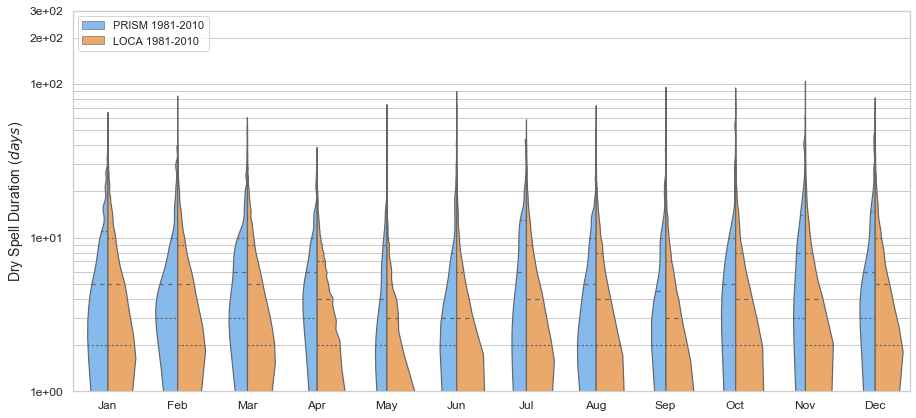

In [66]:
Fig1 = plt.figure()
Fig1.set_size_inches(15.0, 7.0)
ax11 = Fig1.add_subplot(111)
g = sns.violinplot( x="Month", y="MonTotal", hue="DLabel", split=True,
                inner="quart", cut=0, linewidth=1.2,
                palette={ PrismLabel : "xkcd:sky blue", 
                          LocaLabel : "xkcd:pale orange" },
                data=DPDF, ax=ax11, legend_out=True )
g.legend(prop=dict(size=12))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=14 )
g.set_ylabel('Dry Spell Duration ($days$)', fontsize=14)
g.set_ylim( ( 1.0, 300.0))
g.tick_params(axis='both', which='major', labelsize=12)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### Projection 1: 2011-2040

#### Make DataFrame for Split Violin

In [67]:
PrismLabel = "PRISM 1981-2010"
LocaLabel = "LOCA 2011-2040"

In [68]:
MonthLabels = list()
DSetLabels = list()

In [69]:
for jJ in range( 1, 13, 1):
    PriAr = PrismMonDict[jJ]
    NumPRISM = PriAr.shape[0]
    LocaAr = L_P1_MD[jJ]
    NumLOCA = LocaAr.shape[0]
    PRISM_Labels = [ PrismLabel for x in range( NumPRISM ) ]
    LOCA_Labels = [ LocaLabel for x in range( NumLOCA ) ]
    AllLabels = deepcopy( PRISM_Labels )
    AllLabels.extend( LOCA_Labels )
    DSetLabels.extend( AllLabels )
    if jJ == 1:
        MonthLabels.extend( ["Jan" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 2:
        MonthLabels.extend( ["Feb" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 3:
        MonthLabels.extend( ["Mar" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 4:
        MonthLabels.extend( ["Apr" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 5:
        MonthLabels.extend( ["May" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 6:
        MonthLabels.extend( ["Jun" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 7:
        MonthLabels.extend( ["Jul" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 8:
        MonthLabels.extend( ["Aug" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 9:
        MonthLabels.extend( ["Sep" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 10:
        MonthLabels.extend( ["Oct" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 11:
        MonthLabels.extend( ["Nov" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 12:
        MonthLabels.extend( ["Dec" for x in range( NumPRISM + NumLOCA ) ] )
    # end if
    if jJ == 1:
        AllValues = np.concatenate( [ PriAr, LocaAr ], axis=0 )
    else:
        AllValues = np.concatenate( [ AllValues, PriAr, LocaAr ], axis=0 )
    # end if

In [70]:
DataDict = { "DLabel" : DSetLabels,
             "Month" : MonthLabels,
             "MonTotal" : AllValues, }
P1DF = pd.DataFrame( data=DataDict )

In [71]:
display( HTML( P1DF.head().to_html() ) )

,DLabel,Month,MonTotal
0,PRISM 1981-2010,Jan,5
1,PRISM 1981-2010,Jan,2
2,PRISM 1981-2010,Jan,4
3,PRISM 1981-2010,Jan,2
4,PRISM 1981-2010,Jan,15


In [72]:
display( HTML( P1DF.describe().to_html() ) )

,MonTotal
count,1.798223e+06
mean,6.463764e+00
std,7.093268e+00
min,1.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,8.000000e+00
max,1.350000e+02


In [73]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_MonDrySpell_2011-2040.pickle" ) )
P1DF.to_pickle( OutFiler, compression='zip', protocol=-1 )

#### Plot

In [74]:
#preTicks = [ 0.0 + (x *25.0) for x in range(9) ]
preTicks = [ 1.0, 10.0, 100.0, 200.0, 300.0 ]

In [75]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MonDrySpell_Comp_2011-2040.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\MonDrySpell_Comp_2011-2040.svg'

In [76]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MonDrySpell_Comp_2011-2040.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\MonDrySpell_Comp_2011-2040.png'

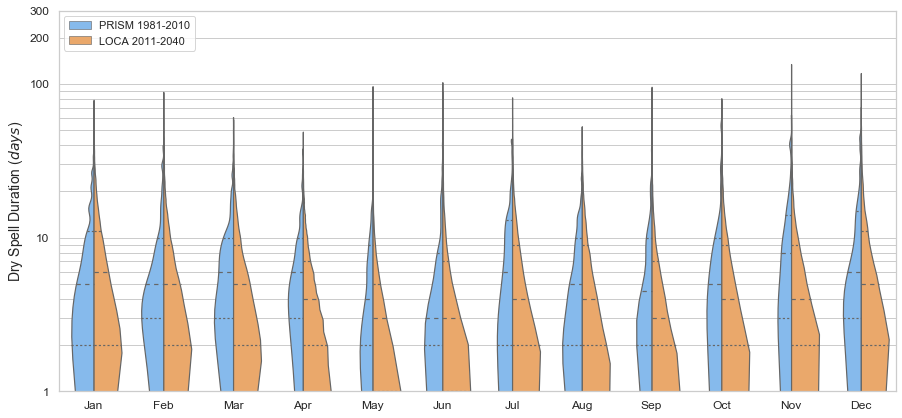

In [77]:
Fig1 = plt.figure()
Fig1.set_size_inches(15.0, 7.0)
ax11 = Fig1.add_subplot(111)
g = sns.violinplot( x="Month", y="MonTotal", hue="DLabel", split=True,
                inner="quart", cut=0, linewidth=1.2,
                palette={ PrismLabel : "xkcd:sky blue", 
                          LocaLabel : "xkcd:pale orange" },
                data=P1DF, ax=ax11, legend_out=True )
g.legend(prop=dict(size=12))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=14 )
g.set_ylabel('Dry Spell Duration ($days$)', fontsize=14)
g.set_ylim( ( 1.0, 300.0))
g.tick_params(axis='both', which='major', labelsize=12)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### Projection 2: 2011-2040

#### Make DataFrame for Split Violin

In [78]:
PrismLabel = "PRISM 1981-2010"
LocaLabel = "LOCA 2041-2070"

In [79]:
MonthLabels = list()
DSetLabels = list()

In [80]:
for jJ in range( 1, 13, 1):
    PriAr = PrismMonDict[jJ]
    NumPRISM = PriAr.shape[0]
    LocaAr = L_P2_MD[jJ]
    NumLOCA = LocaAr.shape[0]
    PRISM_Labels = [ PrismLabel for x in range( NumPRISM ) ]
    LOCA_Labels = [ LocaLabel for x in range( NumLOCA ) ]
    AllLabels = deepcopy( PRISM_Labels )
    AllLabels.extend( LOCA_Labels )
    DSetLabels.extend( AllLabels )
    if jJ == 1:
        MonthLabels.extend( ["Jan" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 2:
        MonthLabels.extend( ["Feb" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 3:
        MonthLabels.extend( ["Mar" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 4:
        MonthLabels.extend( ["Apr" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 5:
        MonthLabels.extend( ["May" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 6:
        MonthLabels.extend( ["Jun" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 7:
        MonthLabels.extend( ["Jul" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 8:
        MonthLabels.extend( ["Aug" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 9:
        MonthLabels.extend( ["Sep" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 10:
        MonthLabels.extend( ["Oct" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 11:
        MonthLabels.extend( ["Nov" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 12:
        MonthLabels.extend( ["Dec" for x in range( NumPRISM + NumLOCA ) ] )
    # end if
    if jJ == 1:
        AllValues = np.concatenate( [ PriAr, LocaAr ], axis=0 )
    else:
        AllValues = np.concatenate( [ AllValues, PriAr, LocaAr ], axis=0 )
    # end if

In [81]:
DataDict = { "DLabel" : DSetLabels,
             "Month" : MonthLabels,
             "MonTotal" : AllValues, }
P2DF = pd.DataFrame( data=DataDict )

In [82]:
display( HTML( P2DF.head().to_html() ) )

,DLabel,Month,MonTotal
0,PRISM 1981-2010,Jan,5
1,PRISM 1981-2010,Jan,2
2,PRISM 1981-2010,Jan,4
3,PRISM 1981-2010,Jan,2
4,PRISM 1981-2010,Jan,15


In [83]:
display( HTML( P2DF.describe().to_html() ) )

,MonTotal
count,1.756485e+06
mean,6.677818e+00
std,7.472265e+00
min,1.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,9.000000e+00
max,1.210000e+02


In [84]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_MonDrySpell_2041-2070.pickle" ) )
P2DF.to_pickle( OutFiler, compression='zip', protocol=-1 )

#### Plot

In [85]:
#preTicks = [ 0.0 + (x *25.0) for x in range(9) ]
preTicks = [ 1.0, 10.0, 100.0, 200.0, 300.0 ]

In [86]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MonDrySpell_Comp_2041-2070.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\MonDrySpell_Comp_2041-2070.svg'

In [87]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MonDrySpell_Comp_2041-2070.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\MonDrySpell_Comp_2041-2070.png'

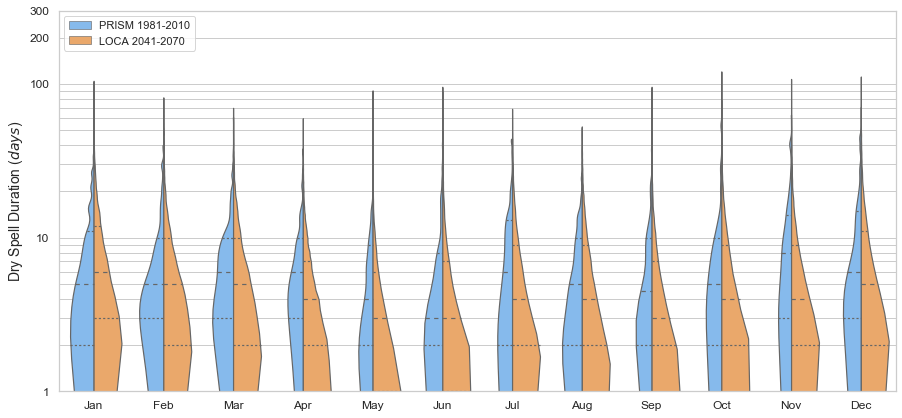

In [88]:
Fig1 = plt.figure()
Fig1.set_size_inches(15.0, 7.0)
ax11 = Fig1.add_subplot(111)
g = sns.violinplot( x="Month", y="MonTotal", hue="DLabel", split=True,
                inner="quart", cut=0, linewidth=1.2,
                palette={ PrismLabel : "xkcd:sky blue", 
                          LocaLabel : "xkcd:pale orange" },
                data=P2DF, ax=ax11, legend_out=True )
g.legend(prop=dict(size=12))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=14 )
g.set_ylabel('Dry Spell Duration ($days$)', fontsize=14)
g.set_ylim( ( 1.0, 300.0))
g.tick_params(axis='both', which='major', labelsize=12)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

### Projection 3: 2071-2100

#### Make DataFrame for Split Violin

In [89]:
PrismLabel = "PRISM 1981-2010"
LocaLabel = "LOCA 2071-2099"

In [90]:
MonthLabels = list()
DSetLabels = list()

In [91]:
for jJ in range( 1, 13, 1):
    PriAr = PrismMonDict[jJ]
    NumPRISM = PriAr.shape[0]
    LocaAr = L_P3_MD[jJ]
    NumLOCA = LocaAr.shape[0]
    PRISM_Labels = [ PrismLabel for x in range( NumPRISM ) ]
    LOCA_Labels = [ LocaLabel for x in range( NumLOCA ) ]
    AllLabels = deepcopy( PRISM_Labels )
    AllLabels.extend( LOCA_Labels )
    DSetLabels.extend( AllLabels )
    if jJ == 1:
        MonthLabels.extend( ["Jan" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 2:
        MonthLabels.extend( ["Feb" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 3:
        MonthLabels.extend( ["Mar" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 4:
        MonthLabels.extend( ["Apr" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 5:
        MonthLabels.extend( ["May" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 6:
        MonthLabels.extend( ["Jun" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 7:
        MonthLabels.extend( ["Jul" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 8:
        MonthLabels.extend( ["Aug" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 9:
        MonthLabels.extend( ["Sep" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 10:
        MonthLabels.extend( ["Oct" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 11:
        MonthLabels.extend( ["Nov" for x in range( NumPRISM + NumLOCA ) ] )
    elif jJ == 12:
        MonthLabels.extend( ["Dec" for x in range( NumPRISM + NumLOCA ) ] )
    # end if
    if jJ == 1:
        AllValues = np.concatenate( [ PriAr, LocaAr ], axis=0 )
    else:
        AllValues = np.concatenate( [ AllValues, PriAr, LocaAr ], axis=0 )
    # end if

In [92]:
DataDict = { "DLabel" : DSetLabels,
             "Month" : MonthLabels,
             "MonTotal" : AllValues, }
P3DF = pd.DataFrame( data=DataDict )

In [93]:
display( HTML( P3DF.head().to_html() ) )

,DLabel,Month,MonTotal
0,PRISM 1981-2010,Jan,5
1,PRISM 1981-2010,Jan,2
2,PRISM 1981-2010,Jan,4
3,PRISM 1981-2010,Jan,2
4,PRISM 1981-2010,Jan,15


In [94]:
display( HTML( P3DF.describe().to_html() ) )

,MonTotal
count,1.658079e+06
mean,6.916949e+00
std,7.844924e+00
min,1.000000e+00
25%,2.000000e+00
50%,4.000000e+00
75%,9.000000e+00
max,1.770000e+02


In [95]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_MonDrySpell_2071-2100.pickle" ) )
P3DF.to_pickle( OutFiler, compression='zip', protocol=-1 )

#### Plot

In [96]:
#preTicks = [ 0.0 + (x *25.0) for x in range(9) ]
preTicks = [ 1.0, 10.0, 100.0, 200.0, 300.0 ]

In [97]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MonDrySpell_Comp_2071-2100.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\MonDrySpell_Comp_2071-2100.svg'

In [98]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "MonDrySpell_Comp_2071-2100.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\MonDrySpell_Comp_2071-2100.png'

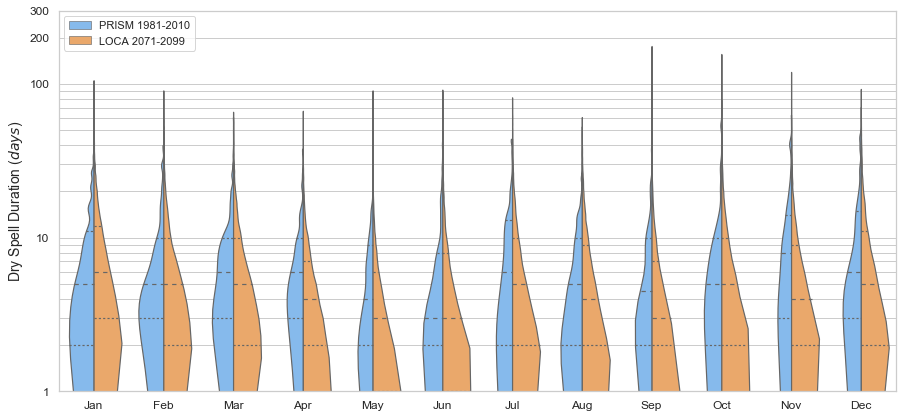

In [99]:
Fig1 = plt.figure()
Fig1.set_size_inches(15.0, 7.0)
ax11 = Fig1.add_subplot(111)
g = sns.violinplot( x="Month", y="MonTotal", hue="DLabel", split=True,
                inner="quart", cut=0, linewidth=1.2,
                palette={ PrismLabel : "xkcd:sky blue", 
                          LocaLabel : "xkcd:pale orange" },
                data=P3DF, ax=ax11, legend_out=True )
g.legend(prop=dict(size=12))
g.legend(loc="upper left")
g.set_yscale('log')
g.grid(b=True, which="both", axis='y')
g.set_yticks( preTicks )
g.set_xlabel('', fontsize=14 )
g.set_ylabel('Dry Spell Duration ($days$)', fontsize=14)
g.set_ylim( ( 1.0, 300.0))
g.tick_params(axis='both', which='major', labelsize=12)
g.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

## Final Plots

Load the dataframes and do the plot so that can skip all of the previous

In [100]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_MonDrySpell_1981-2010.pickle" ) )
DPDF = pd.read_pickle( InFiler, compression='zip' )

In [101]:
display( HTML( DPDF.head().to_html() ) )

,DLabel,Month,MonTotal
0,PRISM 1981-2010,Jan,5
1,PRISM 1981-2010,Jan,2
2,PRISM 1981-2010,Jan,4
3,PRISM 1981-2010,Jan,2
4,PRISM 1981-2010,Jan,15


In [102]:
DPDF["DLabel"].unique()

array(['PRISM 1981-2010', 'LOCA 1981-2010'], dtype=object)

In [103]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_MonDrySpell_2011-2040.pickle" ) )
P1DF = pd.read_pickle( InFiler, compression='zip' )

In [104]:
display( HTML( P1DF.head().to_html() ) )

,DLabel,Month,MonTotal
0,PRISM 1981-2010,Jan,5
1,PRISM 1981-2010,Jan,2
2,PRISM 1981-2010,Jan,4
3,PRISM 1981-2010,Jan,2
4,PRISM 1981-2010,Jan,15


In [105]:
P1DF["DLabel"].unique()

array(['PRISM 1981-2010', 'LOCA 2011-2040'], dtype=object)

In [106]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_MonDrySpell_2041-2070.pickle" ) )
P2DF = pd.read_pickle( InFiler, compression='zip' )

In [107]:
display( HTML( P2DF.head().to_html() ) )

,DLabel,Month,MonTotal
0,PRISM 1981-2010,Jan,5
1,PRISM 1981-2010,Jan,2
2,PRISM 1981-2010,Jan,4
3,PRISM 1981-2010,Jan,2
4,PRISM 1981-2010,Jan,15


In [108]:
P2DF["DLabel"].unique()

array(['PRISM 1981-2010', 'LOCA 2041-2070'], dtype=object)

In [109]:
InFiler = os.path.normpath( os.path.join( OUT_DIR, "DF_MonDrySpell_2071-2100.pickle" ) )
P3DF = pd.read_pickle( InFiler, compression='zip' )

In [110]:
display( HTML( P3DF.head().to_html() ) )

,DLabel,Month,MonTotal
0,PRISM 1981-2010,Jan,5
1,PRISM 1981-2010,Jan,2
2,PRISM 1981-2010,Jan,4
3,PRISM 1981-2010,Jan,2
4,PRISM 1981-2010,Jan,15


In [111]:
P3DF["DLabel"].unique()

array(['PRISM 1981-2010', 'LOCA 2071-2099'], dtype=object)

In [112]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_DrySpell_All_BXN.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_DrySpell_All_BXN.svg'

In [113]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_DrySpell_All_BXN.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_DrySpell_All_BXN.png'

In [114]:
PrismLabel1 = "PRISM 1981-2010"
LocaLabel1 = "LOCA 1981-2010"
PrismLabel2 = "PRISM 1981-2010"
LocaLabel2 = "LOCA 2011-2040"
PrismLabel3 = "PRISM 1981-2010"
LocaLabel3 = "LOCA 2041-2070"
PrismLabel4 = "PRISM 1981-2010"
LocaLabel4 = "LOCA 2071-2099"

In [115]:
preTicks = [ 1.0, 10.0, 100.0, 200.0, 300.0 ]

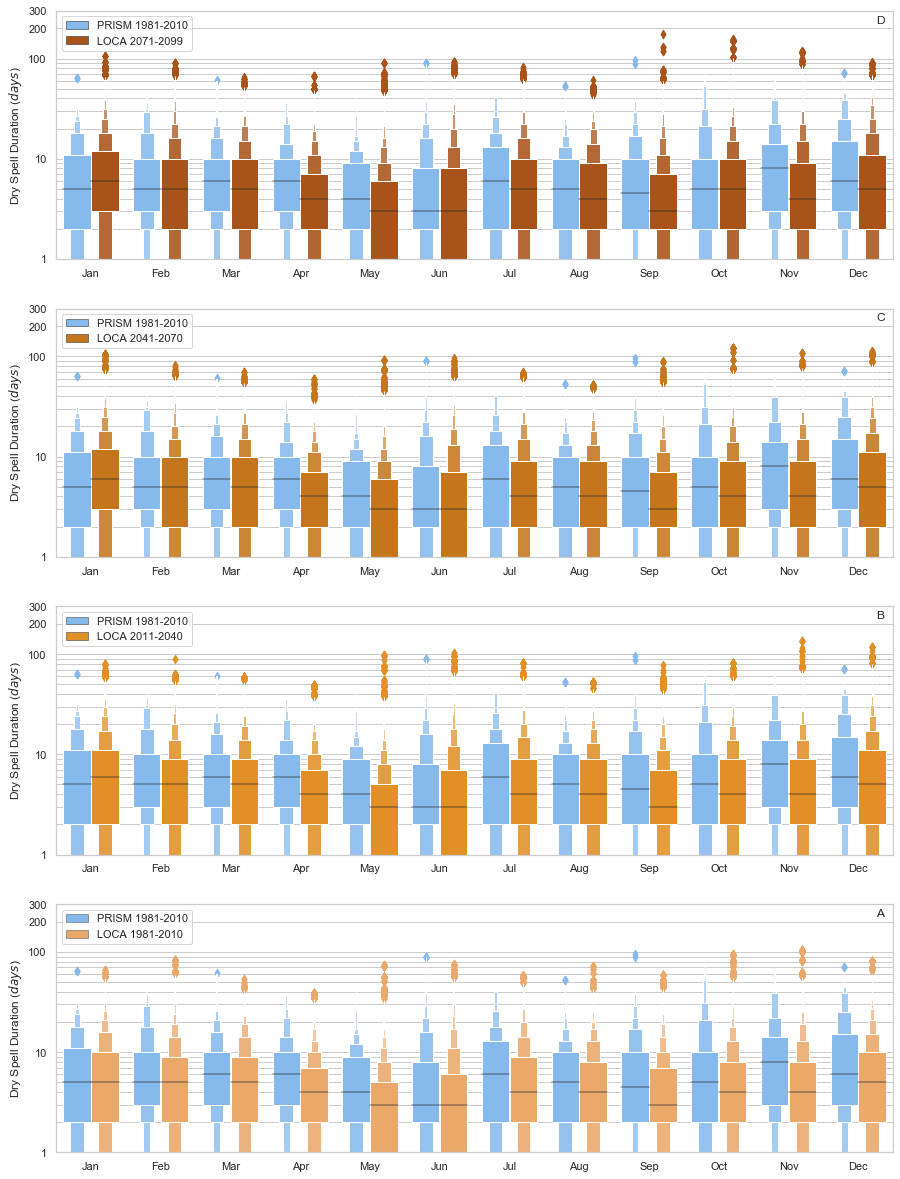

In [116]:
Fig1 = plt.figure()
Fig1.set_size_inches(15, 21)
ax11 = Fig1.add_subplot(4,1,1)
g1 = sns.boxenplot( x="Month", y="MonTotal", hue="DLabel",
                   dodge=True, linewidth=1.2, orient="v",
                   palette={ PrismLabel4 : "xkcd:sky blue", 
                             LocaLabel4 : "xkcd:burnt orange" },
                   data=P3DF, ax=ax11 )
g1.legend(prop=dict(size=11))
g1.legend(loc="upper left")
g1.set_yscale('log')
g1.grid(b=True, which="both", axis='y')
g1.set_yticks( preTicks )
g1.set_xlabel('', fontsize=12 )
g1.set_ylabel('Dry Spell Duration ($days$)', fontsize=12)
g1.set_ylim( ( 1.0, 300.0))
g1.tick_params(axis='both', which='major', labelsize=11)
g1.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
g1.annotate("D", xy=(0.98,0.95), xycoords="axes fraction")
ax21 = Fig1.add_subplot(4,1,2)
g2 = sns.boxenplot( x="Month", y="MonTotal", hue="DLabel",
                   dodge=True, linewidth=1.2, orient="v",
                   palette={ PrismLabel3 : "xkcd:sky blue", 
                             LocaLabel3 : "xkcd:pumpkin" },
                   data=P2DF, ax=ax21 )
g2.legend(prop=dict(size=11))
g2.legend(loc="upper left")
g2.set_yscale('log')
g2.grid(b=True, which="both", axis='y')
g2.set_yticks( preTicks )
g2.set_xlabel('', fontsize=12 )
g2.set_ylabel('Dry Spell Duration ($days$)', fontsize=12)
g2.set_ylim( ( 1.0, 300.0))
g2.tick_params(axis='both', which='major', labelsize=11)
g2.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
g2.annotate("C", xy=(0.98,0.95), xycoords="axes fraction")
ax31 = Fig1.add_subplot(4,1,3)
g3 = sns.boxenplot( x="Month", y="MonTotal", hue="DLabel",
                   dodge=True, linewidth=1.2, orient="v",
                   palette={ PrismLabel2 : "xkcd:sky blue", 
                             LocaLabel2 : "xkcd:tangerine" },
                   data=P1DF, ax=ax31 )
g3.legend(prop=dict(size=11))
g3.legend(loc="upper left")
g3.set_yscale('log')
g3.grid(b=True, which="both", axis='y')
g3.set_yticks( preTicks )
g3.set_xlabel('', fontsize=12 )
g3.set_ylabel('Dry Spell Duration ($days$)', fontsize=12)
g3.set_ylim( ( 1.0, 300.0))
g3.tick_params(axis='both', which='major', labelsize=11)
g3.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
g3.annotate("B", xy=(0.98,0.95), xycoords="axes fraction")
ax41 = Fig1.add_subplot(4,1,4)
g4 = sns.boxenplot( x="Month", y="MonTotal", hue="DLabel",
                   dodge=True, linewidth=1.2, orient="v",
                   palette={ PrismLabel1 : "xkcd:sky blue", 
                             LocaLabel1 : "xkcd:pale orange" },
                   data=DPDF, ax=ax41 )
g4.legend(prop=dict(size=11))
g4.legend(loc="upper left")
g4.set_yscale('log')
g4.grid(b=True, which="both", axis='y')
g4.set_yticks( preTicks )
g4.set_xlabel('', fontsize=12 )
g4.set_ylabel('Dry Spell Duration ($days$)', fontsize=12)
g4.set_ylim( ( 1.0, 300.0))
g4.tick_params(axis='both', which='major', labelsize=11)
g4.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
g4.annotate("A", xy=(0.98,0.95), xycoords="axes fraction")
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )

In [117]:
nP1DF = P1DF[P1DF["DLabel"] == 'LOCA 2011-2040'].copy()
nP1DF["DLabel"].unique()

array(['LOCA 2011-2040'], dtype=object)

In [118]:
nP2DF = P2DF[P2DF["DLabel"] == 'LOCA 2041-2070'].copy()
nP3DF = P3DF[P3DF["DLabel"] == 'LOCA 2071-2099'].copy()
len( nP2DF ), len( nP3DF )

(1709112, 1610706)

In [119]:
All1 = pd.concat( [ DPDF, nP1DF, nP2DF, nP3DF ], ignore_index=True )

In [120]:
All1["DLabel"].unique()

array(['PRISM 1981-2010', 'LOCA 1981-2010', 'LOCA 2011-2040',
       'LOCA 2041-2070', 'LOCA 2071-2099'], dtype=object)

In [121]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_DrySpell_All1ax_BXN.svg") )
OutSVG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_DrySpell_All1ax_BXN.svg'

In [122]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_DrySpell_All1ax_BXN.png") )
OutPNG

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_DrySpell_All1ax_BXN.png'

In [123]:
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "Mon_DrySpell_All1ax_BXN.pdf") )
OutPDF

'C:\\Users\\nmartin\\Documents\\CC_IRD\\Events\\Plots\\Mon_DrySpell_All1ax_BXN.pdf'

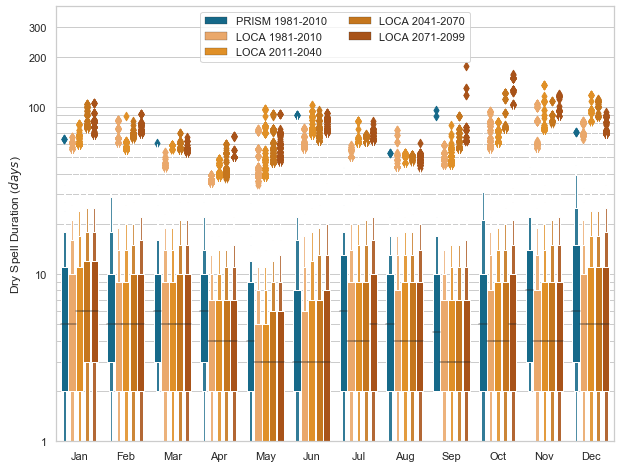

In [124]:
Fig1 = plt.figure()
Fig1.set_size_inches(10.0, 8.0)
ax11 = Fig1.add_subplot()
g1 = sns.boxenplot( x="Month", y="MonTotal", hue="DLabel",
                   dodge=True, linewidth=0.5, orient="v",
                   palette={ PrismLabel1 : "xkcd:ocean blue",
                             LocaLabel1 : "xkcd:pale orange",
                             LocaLabel2 : "xkcd:tangerine",
                             LocaLabel3 : "xkcd:pumpkin",
                             LocaLabel4 : "xkcd:burnt orange" },
                   data=All1, ax=ax11 )
g1.legend(prop=dict(size=11))
g1.legend(loc="upper center", ncol=2)
g1.set_yscale('log')
g1.grid(b=True, which="both", axis='y')
g1.set_yticks( preTicks )
g1.set_xlabel('', fontsize=12 )
g1.set_ylabel('Dry Spell Duration ($days$)', fontsize=12)
g1.set_ylim( ( 1.0, 400.0))
g1.tick_params(axis='both', which='major', labelsize=11)
g1.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )
Fig1.savefig( OutPDF )